In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:15 http

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz

In [7]:
!tar xf spark-2.3.1-bin-hadoop2.7.tgz

In [8]:
!pip install -q findspark

In [119]:
!pip install pandas

In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

In [130]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import *

In [131]:
sc = SparkContext.getOrCreate()

In [132]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data = spark.read.load("./data/stockx/", format="csv", header=True, inferSchema="True")

In [15]:
dix_premiere_vente = data.head(10)
while i < len(dix_premiere_vente):

print(data.head(10))

[Row(Order Date='3/7/18', Brand=' Yeezy', Sneaker Name='Adidas-Yeezy-Boost-350-V2-Blue-Tint', Sale Price='$390', Retail Price='$220', Release Date='12/16/17', Shoe Size=11.0, Buyer Region='Florida'), Row(Order Date='3/7/18', Brand=' Yeezy', Sneaker Name='Adidas-Yeezy-Boost-350-V2-Blue-Tint', Sale Price='$399', Retail Price='$220', Release Date='12/16/17', Shoe Size=13.0, Buyer Region='New York'), Row(Order Date='3/7/18', Brand=' Yeezy', Sneaker Name='Adidas-Yeezy-Boost-350-V2-Blue-Tint', Sale Price='$370', Retail Price='$220', Release Date='12/16/17', Shoe Size=9.0, Buyer Region='New York'), Row(Order Date='3/7/18', Brand=' Yeezy', Sneaker Name='Adidas-Yeezy-Boost-350-V2-Blue-Tint', Sale Price='$423', Retail Price='$220', Release Date='12/16/17', Shoe Size=5.0, Buyer Region='New York'), Row(Order Date='3/7/18', Brand=' Yeezy', Sneaker Name='Adidas-Yeezy-Boost-350-V2-Blue-Tint', Sale Price='$375', Retail Price='$220', Release Date='12/16/17', Shoe Size=10.0, Buyer Region='Pennsylvania')

In [107]:
#Traitement des modèles
modele = data.groupBy('Sneaker Name').count().orderBy('count').collect()

i = 0
while i < len(modele):
  ligne = modele[i]
  nom_ligne = ligne["Sneaker Name"]
  present = nom_ligne.find('$')
  if present != -1:
    modele.pop(i)
  i = i + 1

modele_moins_achete = modele[0]
modele_plus_achete = modele[len(modele)-1]

print('La modèle la moins acheté est :', modele_moins_achete["Sneaker Name"], 'acheté ' + str(modele_moins_achete["count"]), 'fois en 2018')
print('La modèle la plus acheté est :', modele_plus_achete["Sneaker Name"], 'acheté ' + str(modele_plus_achete["count"]), 'fois en 2018')

x = 0
dix_modele_moins_achete = []
while x < 11:
  dix_modele_moins_achete.append(modele[x])
  x = x + 1

x = 1
dix_modele_plus_achete = []
while x < 11:
  dix_modele_plus_achete.append(modele[len(modele)-x])
  x = x + 1

La modèle la moins acheté est : Air-Jordan-1-Retro-High-Off-White-Chicago acheté 1 fois en 2018
La modèle la plus acheté est : adidas-Yeezy-Boost-350-V2-Butter acheté 11423 fois en 2018


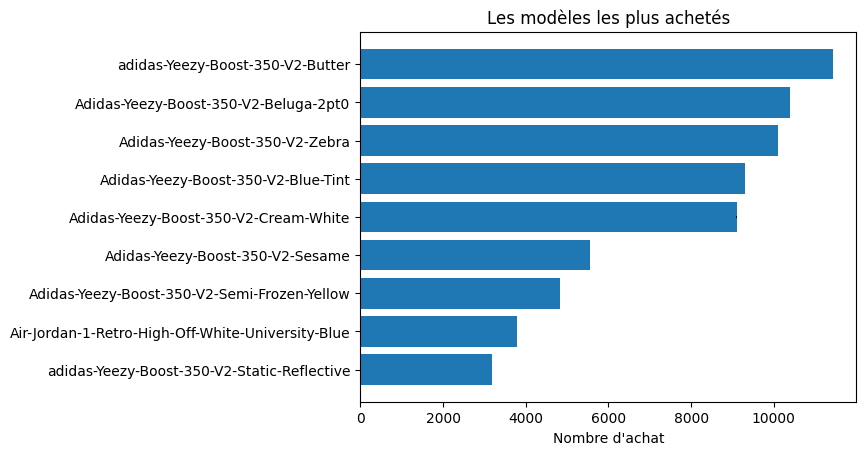

In [94]:
#Les modèles les plus achetès
ligne1 = dix_modele_plus_achete[0]
ligne2 = dix_modele_plus_achete[1]
ligne3 = dix_modele_plus_achete[2]
ligne4 = dix_modele_plus_achete[3]
ligne5 = dix_modele_plus_achete[4]
ligne6 = dix_modele_plus_achete[5]
ligne7 = dix_modele_plus_achete[6]
ligne8 = dix_modele_plus_achete[7]
ligne9 = dix_modele_plus_achete[8]
ligne10 = dix_modele_plus_achete[9]

plt.rcdefaults()
fig, ax = plt.subplots()

x = (ligne1["Sneaker Name"], ligne2["Sneaker Name"], ligne3["Sneaker Name"], ligne4["Sneaker Name"], ligne5["Sneaker Name"], ligne6["Sneaker Name"], ligne8["Sneaker Name"], ligne9["Sneaker Name"], ligne10["Sneaker Name"])
y_pos = np.arange(len(people))
y = [ligne1["count"], ligne2["count"], ligne3["count"], ligne4["count"], ligne5["count"], ligne6["count"], ligne8["count"], ligne9["count"], ligne10["count"]]

ax.barh(y_pos, y, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()
ax.set_xlabel('Nombre d\'achat')
ax.set_title('Les modèles les plus achetés')

plt.show()

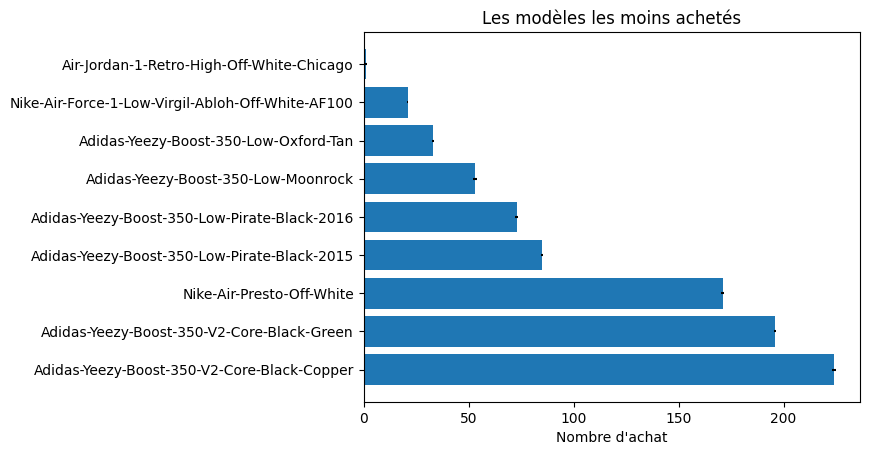

In [115]:
#Les modèles les moins achetès
i = 0
while i < len(dix_modele_moins_achete):
  ligne = dix_modele_moins_achete[i]
  nom_ligne = ligne["Sneaker Name"]
  present = nom_ligne.find('$')
  if present != -1:
    dix_modele_moins_achete.pop(i)
  i = i + 1

ligne1 = dix_modele_moins_achete[0]
ligne2 = dix_modele_moins_achete[1]
ligne3 = dix_modele_moins_achete[2]
ligne4 = dix_modele_moins_achete[3]
ligne5 = dix_modele_moins_achete[4]
ligne6 = dix_modele_moins_achete[5]
ligne7 = dix_modele_moins_achete[6]
ligne8 = dix_modele_moins_achete[7]
ligne9 = dix_modele_moins_achete[8]
ligne10 = dix_modele_moins_achete[9]

plt.rcdefaults()
fig, ax = plt.subplots()

x = (ligne1["Sneaker Name"], ligne2["Sneaker Name"], ligne3["Sneaker Name"], ligne4["Sneaker Name"], ligne5["Sneaker Name"], ligne6["Sneaker Name"], ligne8["Sneaker Name"], ligne9["Sneaker Name"], ligne10["Sneaker Name"])
y_pos = np.arange(len(people))
y = [ligne1["count"], ligne2["count"], ligne3["count"], ligne4["count"], ligne5["count"], ligne6["count"], ligne8["count"], ligne9["count"], ligne10["count"]]

ax.barh(y_pos, y, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()
ax.set_xlabel('Nombre d\'achat')
ax.set_title('Les modèles les moins achetés')

plt.show()

In [112]:
#Traitement des états
etat = data.groupBy('Buyer Region').count().orderBy('count').collect()

etats_moins_achete = etat[0]
etats_plus_achete = etat[len(resultat)-1]

print('L\'état qui a le moins acheté est :', etats_moins_achete["Buyer Region"], 'a fait ' + str(etats_moins_achete["count"]), 'achats en 2018')
print('L\'état qui a le plus acheté est :', etats_plus_achete["Buyer Region"], 'a fait ' + str(etats_plus_achete["count"]), 'achats en 2018')

x = 0
dix_etats_moins_achete = []
while x < 11:
  dix_etats_moins_achete.append(etat[x])
  x = x + 1

x = 1
dix_etats_plus_achete = []
while x < 11:
  dix_etats_plus_achete.append(etat[len(etat)-x])
  x = x + 1

L'état qui a le moins acheté est : Wyoming a fait 40 achats en 2018
L'état qui a le plus acheté est : Tennessee a fait 712 achats en 2018


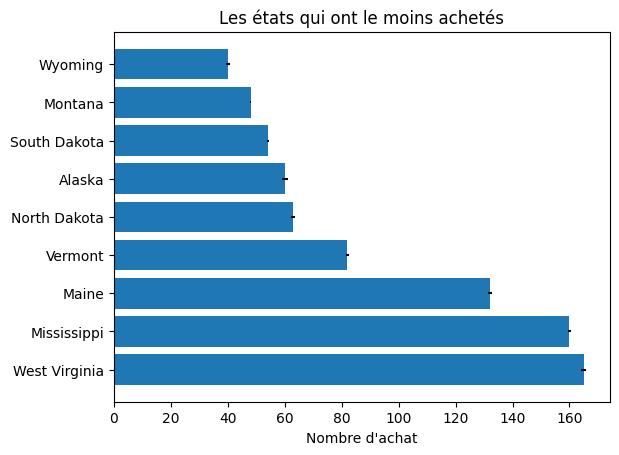

In [117]:
#Les états qui ont le moins achetès
ligne1 = dix_etats_moins_achete[0]
ligne2 = dix_etats_moins_achete[1]
ligne3 = dix_etats_moins_achete[2]
ligne4 = dix_etats_moins_achete[3]
ligne5 = dix_etats_moins_achete[4]
ligne6 = dix_etats_moins_achete[5]
ligne7 = dix_etats_moins_achete[6]
ligne8 = dix_etats_moins_achete[7]
ligne9 = dix_etats_moins_achete[8]
ligne10 = dix_etats_moins_achete[9]

plt.rcdefaults()
fig, ax = plt.subplots()

x = (ligne1["Buyer Region"], ligne2["Buyer Region"], ligne3["Buyer Region"], ligne4["Buyer Region"], ligne5["Buyer Region"], ligne6["Buyer Region"], ligne8["Buyer Region"], ligne9["Buyer Region"], ligne10["Buyer Region"])
y_pos = np.arange(len(people))
y = [ligne1["count"], ligne2["count"], ligne3["count"], ligne4["count"], ligne5["count"], ligne6["count"], ligne8["count"], ligne9["count"], ligne10["count"]]

ax.barh(y_pos, y, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()
ax.set_xlabel('Nombre d\'achat')
ax.set_title('Les états qui ont le moins achetés')

plt.show()

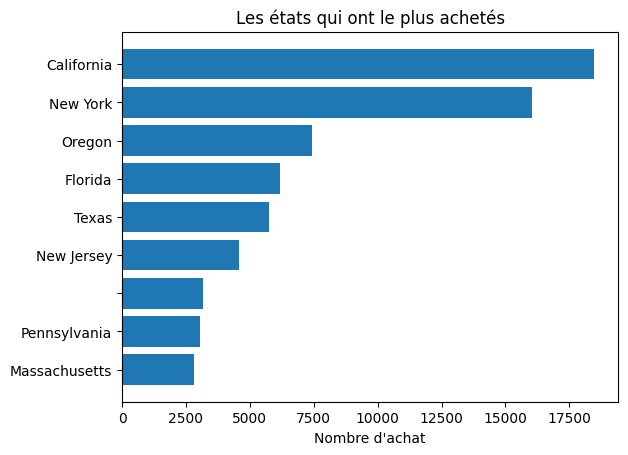

In [116]:
#Les états qui ont le plus achetès
ligne1 = dix_etats_plus_achete[0]
ligne2 = dix_etats_plus_achete[1]
ligne3 = dix_etats_plus_achete[2]
ligne4 = dix_etats_plus_achete[3]
ligne5 = dix_etats_plus_achete[4]
ligne6 = dix_etats_plus_achete[5]
ligne7 = dix_etats_plus_achete[6]
ligne8 = dix_etats_plus_achete[7]
ligne9 = dix_etats_plus_achete[8]
ligne10 = dix_etats_plus_achete[9]

plt.rcdefaults()
fig, ax = plt.subplots()

x = (ligne1["Buyer Region"], ligne2["Buyer Region"], ligne3["Buyer Region"], ligne4["Buyer Region"], ligne5["Buyer Region"], ligne6["Buyer Region"], ligne8["Buyer Region"], ligne9["Buyer Region"], ligne10["Buyer Region"])
y_pos = np.arange(len(people))
y = [ligne1["count"], ligne2["count"], ligne3["count"], ligne4["count"], ligne5["count"], ligne6["count"], ligne8["count"], ligne9["count"], ligne10["count"]]

ax.barh(y_pos, y, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(x)
ax.invert_yaxis()
ax.set_xlabel('Nombre d\'achat')
ax.set_title('Les é
tats qui ont le plus achetés')

plt.show()

In [118]:
#Nombre de vente total
nombre_vente_total = data.count()
print("Le nombre de vente total est de : ", nombre_vente_total)

Le nombre de vente total est de :  99956


In [133]:
data_sale_price = data.select('Sale Price').collect()
data_sale_price

list_sale_price = list()

for price in data_sale_price:
  for p in price:
    p_nb = p.replace(',', '')

    try:
      p_nb = int(p_nb[1:])
      list_sale_price.append(p_nb)
      
    except ValueError:
      continue
      

data_sale = spark.createDataFrame(list_sale_price, IntegerType())

data_sale.show()

+-----+
|value|
+-----+
|  390|
|  399|
|  370|
|  423|
|  375|
|  368|
|  360|
|  422|
|  366|
|  422|
|  363|
|  385|
|  436|
|  376|
|  464|
|  363|
|  419|
|  668|
|  882|
|  799|
+-----+
only showing top 20 rows



In [134]:
# Prix de revente le moins élevè
data_sale.agg({'value' : 'min'}).show()

+----------+
|min(value)|
+----------+
|       186|
+----------+



In [135]:
# Prix de revente le plus élevè
data_sale.agg({'value' : 'max'}).show()

+----------+
|max(value)|
+----------+
|       999|
+----------+



In [136]:
# Moyenne du prix de revente
data_sale.agg({'value' : 'mean'}).show()

+-----------------+
|       avg(value)|
+-----------------+
|415.5621713211212|
+-----------------+



In [126]:
# Nettoyage du data
new_data = data.na.drop()
new_data.count()

new_data.show(10)

+----------+------+--------------------+----------+------------+------------+---------+--------------+
|Order Date| Brand|        Sneaker Name|Sale Price|Retail Price|Release Date|Shoe Size|  Buyer Region|
+----------+------+--------------------+----------+------------+------------+---------+--------------+
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $390|        $220|    12/16/17|     11.0|       Florida|
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $399|        $220|    12/16/17|     13.0|      New York|
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $370|        $220|    12/16/17|      9.0|      New York|
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $423|        $220|    12/16/17|      5.0|      New York|
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $375|        $220|    12/16/17|     10.0|  Pennsylvania|
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $368|        $220|    12/16/17|      8.5|North Carolina|
|    3/7/18| Yeezy|Adidas-Yeezy-Boos...|      $360|        $220|    12/16